In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### Loading and cleaning the data

In [2]:
df_inspections = pd.read_csv('Building_and_Safety_Inspections_20250505.csv')
df_inspections.columns = df_inspections.columns.str.replace(' ', '_')
df_inspections.columns = df_inspections.columns.str.lower()

df_inspections.head()

C:\Users\jer_g\AppData\Local\Temp\ipykernel_7448\2251986688.py:1: DtypeWarning: Columns (2,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inspections = pd.read_csv('Building_and_Safety_Inspections_20250505.csv')


,address,permit,permit_status,inspection_date,inspection_type,inspection_result,latitude/longitude
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)"
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)"
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)"
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)"
4,2836 S ANCHOR AVE,15016 20001 17211,CofO Issued,07/18/2016,Inspection,Permit Finaled,"(34.03878, -118.39963)"


In [3]:
df_inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10396028 entries, 0 to 10396027
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   address             object
 1   permit              object
 2   permit_status       object
 3   inspection_date     object
 4   inspection_type     object
 5   inspection_result   object
 6   latitude/longitude  object
dtypes: object(7)
memory usage: 555.2+ MB


In [4]:
# Remove duplicate rows
df_inspections_cleaned = df_inspections.drop_duplicates(ignore_index=True)
df_inspections_cleaned.permit = df_inspections_cleaned.permit.str.replace(' ', '-')

df_inspections_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9678262 entries, 0 to 9678261
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   address             object
 1   permit              object
 2   permit_status       object
 3   inspection_date     object
 4   inspection_type     object
 5   inspection_result   object
 6   latitude/longitude  object
dtypes: object(7)
memory usage: 516.9+ MB


C:\Users\jer_g\AppData\Local\Temp\ipykernel_7448\810059565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inspections_cleaned.permit = df_inspections_cleaned.permit.str.replace(' ', '-')


In [5]:
# Check for null or empty values in the 'permit' column
print(df_inspections_cleaned.loc[
  (df_inspections_cleaned['permit'].isna()) |
  (df_inspections_cleaned['permit'] == '')]
  )

Empty DataFrame
Columns: [address, permit, permit_status, inspection_date, inspection_type, inspection_result, latitude/longitude]
Index: []


In [6]:
df_permits = pd.read_csv('Building_Permits_20250505.csv')
df_permits.columns = df_permits.columns.str.replace(' ', '_')
df_permits.columns = df_permits.columns.str.lower()

df_permits.head()

C:\Users\jer_g\AppData\Local\Temp\ipykernel_7448\2821924412.py:1: DtypeWarning: Columns (0,1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_permits = pd.read_csv('Building_Permits_20250505.csv')


,assessor_book,assessor_page,assessor_parcel,tract,block,lot,reference_#_(old_permit_#),pcis_permit_#,status,status_date,...,applicant_last_name,applicant_business_name,applicant_address_1,applicant_address_2,applicant_address_3,zone,occupancy,floor_area-l.a._building_code_definition,census_tract,latitude/longitude
0,5007.0,1.0,016,TR 911,NaN,247,NaN,13041-90000-00002,Permit Finaled,01/04/2013 12:00:00 AM,...,NESTERENKO,NaN,6959 VARNA AVE,NaN,"VAN NUYS, CA",R1-1,NaN,0.0,2346.00,POINT (-118.33429 33.99393)
1,5539.0,26.0,008,DAYTON HEIGHTS TRACT,B,9,NaN,13042-90000-00003,Permit Finaled,01/07/2013 12:00:00 AM,...,MCSAVANEY,NaN,8561 SNOWDEN AVE,NaN,"ARLETA, CA",R2-1,NaN,0.0,1927.00,POINT (-118.28576 34.08229)
2,2384.0,21.0,048,TR 6293,NaN,96,NaN,13042-90000-00005,Permit Finaled,04/30/2015 12:00:00 AM,...,GABAY,NaN,18813 W VANOWEN ST,NaN,"RESEDA, CA",R1-1,NaN,0.0,1439.01,POINT (-118.40898 34.13638)
3,5535.0,28.0,001,TR 1186,NaN,28,NaN,13042-90000-00006,Permit Finaled,01/08/2013 12:00:00 AM,...,GABAY,NaN,18813 W VANOWEN ST,NaN,"RESEDA, CA",R1-1-HPOZ,NaN,0.0,1916.10,POINT (-118.30644 34.08528)
4,5432.0,7.0,005,TR 8423,NaN,220,NaN,13042-90000-00001,Permit Finaled,01/04/2013 12:00:00 AM,...,AKHOIAN,NaN,8847 LANKERSHIM BLVD.,NaN,"SUN VALLEY, CA",R1-1VL,NaN,0.0,1951.00,POINT (-118.27098 34.10561)


In [7]:
df_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635148 entries, 0 to 1635147
Data columns (total 54 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   assessor_book                             1633578 non-null  object 
 1   assessor_page                             1633578 non-null  object 
 2   assessor_parcel                           1633578 non-null  object 
 3   tract                                     1628733 non-null  object 
 4   block                                     314788 non-null   object 
 5   lot                                       1624378 non-null  object 
 6   reference_#_(old_permit_#)                697148 non-null   object 
 7   pcis_permit_#                             1635148 non-null  object 
 8   status                                    1635148 non-null  object 
 9   status_date                               1635148 non-null  object 
 10  permit

In [35]:
# Remove duplicate rows
df_permits_cleaned = df_permits.drop_duplicates(ignore_index=True)
df_permits_cleaned = df_permits_cleaned.rename(columns={'pcis_permit_#': 'permit'})

df_permits_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635006 entries, 0 to 1635005
Data columns (total 54 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   assessor_book                             1633436 non-null  object 
 1   assessor_page                             1633436 non-null  object 
 2   assessor_parcel                           1633436 non-null  object 
 3   tract                                     1628592 non-null  object 
 4   block                                     314766 non-null   object 
 5   lot                                       1624236 non-null  object 
 6   reference_#_(old_permit_#)                697062 non-null   object 
 7   permit                                    1635006 non-null  object 
 8   status                                    1635006 non-null  object 
 9   status_date                               1635006 non-null  object 
 10  permit

In [ ]:
# Check for null or empty values in the 'permit' column
print(df_permits_cleaned.loc[
  (df_permits_cleaned['permit'].isna()) |
  (df_permits_cleaned['permit'] == '')]
  )

Empty DataFrame
Columns: [assessor_book, assessor_page, assessor_parcel, tract, block, lot, reference_#_(old_permit_#), pcis_permit_#, status, status_date, permit_type, permit_sub-type, permit_category, project_number, event_code, initiating_office, issue_date, address_start, address_fraction_start, address_end, address_fraction_end, street_direction, street_name, street_suffix, suffix_direction, unit_range_start, unit_range_end, zip_code, work_description, valuation, floor_area-l.a._zoning_code_definition, #_of_residential_dwelling_units, #_of_stories, contractor's_business_name, contractor_address, contractor_city, contractor_state, license_type, license_#, principal_first_name, principal_middle_name, principal_last_name, license_expiration_date, applicant_first_name, applicant_last_name, applicant_business_name, applicant_address_1, applicant_address_2, applicant_address_3, zone, occupancy, floor_area-l.a._building_code_definition, census_tract, latitude/longitude]
Index: []

[0 row

In [ ]:
unique_permits = df_permits_cleaned.drop_duplicates(subset='permit', keep='first')
unique_permits = unique_permits.rename(columns={'latitude/longitude': 'point'})
unique_permits.head()

,assessor_book,assessor_page,assessor_parcel,tract,block,lot,reference_#_(old_permit_#),permit,status,status_date,...,applicant_last_name,applicant_business_name,applicant_address_1,applicant_address_2,applicant_address_3,zone,occupancy,floor_area-l.a._building_code_definition,census_tract,point
0,5007.0,1.0,016,TR 911,NaN,247,NaN,13041-90000-00002,Permit Finaled,01/04/2013 12:00:00 AM,...,NESTERENKO,NaN,6959 VARNA AVE,NaN,"VAN NUYS, CA",R1-1,NaN,0.0,2346.00,POINT (-118.33429 33.99393)
1,5539.0,26.0,008,DAYTON HEIGHTS TRACT,B,9,NaN,13042-90000-00003,Permit Finaled,01/07/2013 12:00:00 AM,...,MCSAVANEY,NaN,8561 SNOWDEN AVE,NaN,"ARLETA, CA",R2-1,NaN,0.0,1927.00,POINT (-118.28576 34.08229)
2,2384.0,21.0,048,TR 6293,NaN,96,NaN,13042-90000-00005,Permit Finaled,04/30/2015 12:00:00 AM,...,GABAY,NaN,18813 W VANOWEN ST,NaN,"RESEDA, CA",R1-1,NaN,0.0,1439.01,POINT (-118.40898 34.13638)
3,5535.0,28.0,001,TR 1186,NaN,28,NaN,13042-90000-00006,Permit Finaled,01/08/2013 12:00:00 AM,...,GABAY,NaN,18813 W VANOWEN ST,NaN,"RESEDA, CA",R1-1-HPOZ,NaN,0.0,1916.10,POINT (-118.30644 34.08528)
4,5432.0,7.0,005,TR 8423,NaN,220,NaN,13042-90000-00001,Permit Finaled,01/04/2013 12:00:00 AM,...,AKHOIAN,NaN,8847 LANKERSHIM BLVD.,NaN,"SUN VALLEY, CA",R1-1VL,NaN,0.0,1951.00,POINT (-118.27098 34.10561)


In [11]:
df_inspections_joined = pd.merge(df_inspections_cleaned,
                                 unique_permits[['permit', 'tract']], 
                     on='permit',
                     how='left')

df_inspections_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9678262 entries, 0 to 9678261
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   address             object
 1   permit              object
 2   permit_status       object
 3   inspection_date     object
 4   inspection_type     object
 5   inspection_result   object
 6   latitude/longitude  object
 7   tract               object
dtypes: object(8)
memory usage: 590.7+ MB


### Question #1

In [12]:
print(df_inspections_cleaned.loc[
  (df_inspections_cleaned['inspection_date'].isna()) |
  (df_inspections_cleaned['inspection_date'] == '')]
  )

                       address             permit permit_status  \
31495     1063 S PLYMOUTH BLVD  14016-20000-13147           NaN   
31958      1064 W BAYVIEW LANE  13041-10000-24412           NaN   
32668      1064 W BAYVIEW LANE  13044-10000-10435           NaN   
32704      1064 W BAYVIEW LANE  13016-10000-15950           NaN   
32810      1064 W BAYVIEW LANE  13042-10000-16462           NaN   
...                        ...                ...           ...   
3857622    3723 S JACKSTADT ST  14042-40000-23926           NaN   
3857623     3730 S POTOMAC AVE  12042-90000-21574           NaN   
3857624   3736 N AMESBURY ROAD  14041-90000-33905           NaN   
3857625      3740 N MONTUSO PL  14042-90000-23278           NaN   
3857626  3740 S MCCLINTOCK AVE  13043-10000-03986           NaN   

        inspection_date inspection_type inspection_result latitude/longitude  
31495               NaN             NaN               NaN                NaN  
31958               NaN             N

In [13]:
# Remove rows where 'inspection_date' is empty or null
df_q1 = df_inspections_cleaned.loc[
    ~df_inspections_cleaned['inspection_date'].isna() & 
    (df_inspections_cleaned['inspection_date'] != '')
]
df_q1.head()

,address,permit,permit_status,inspection_date,inspection_type,inspection_result,latitude/longitude
0,10000 W SANTA MONICA BLVD,14044-10000-02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)"
1,1000 S SANTA FE AVE,15016-10000-18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)"
2,3680 N BUENA PARK DR,15014-10000-04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)"
3,1001 N LINDENWOOD LANE,16042-90000-14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)"
4,2836 S ANCHOR AVE,15016-20001-17211,CofO Issued,07/18/2016,Inspection,Permit Finaled,"(34.03878, -118.39963)"


In [ ]:
# Check for null or empty values in the 'inspection_date' column
print(df_q1.loc[
  (df_q1['inspection_date'].isna()) |
  (df_q1['inspection_date'] == '')]
  )

Empty DataFrame
Columns: [address, permit, permit_status, inspection_date, inspection_type, inspection_result, latitude/longitude]
Index: []


In [17]:
df_q1['inspection_date'] = pd.to_datetime(df_q1['inspection_date'], errors='coerce')
df_q1['inspection_year'] = df_q1['inspection_date'].dt.year

yearly_inspections = df_q1.groupby('inspection_year').size().reset_index(name='inspection_count')

C:\Users\jer_g\AppData\Local\Temp\ipykernel_7448\1703793678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['inspection_date'] = pd.to_datetime(df_q1['inspection_date'], errors='coerce')
C:\Users\jer_g\AppData\Local\Temp\ipykernel_7448\1703793678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['inspection_year'] = df_q1['inspection_date'].dt.year


The table below shows the number of inspections per year. The data is grouped by year and the count of inspections is calculated for each year.

In [18]:
yearly_inspections

,inspection_year,inspection_count
0,2013,655582
1,2014,573691
2,2015,710942
3,2016,666500
4,2017,478931
5,2018,799060
6,2019,938665
7,2020,860328
8,2021,852581
9,2022,926476


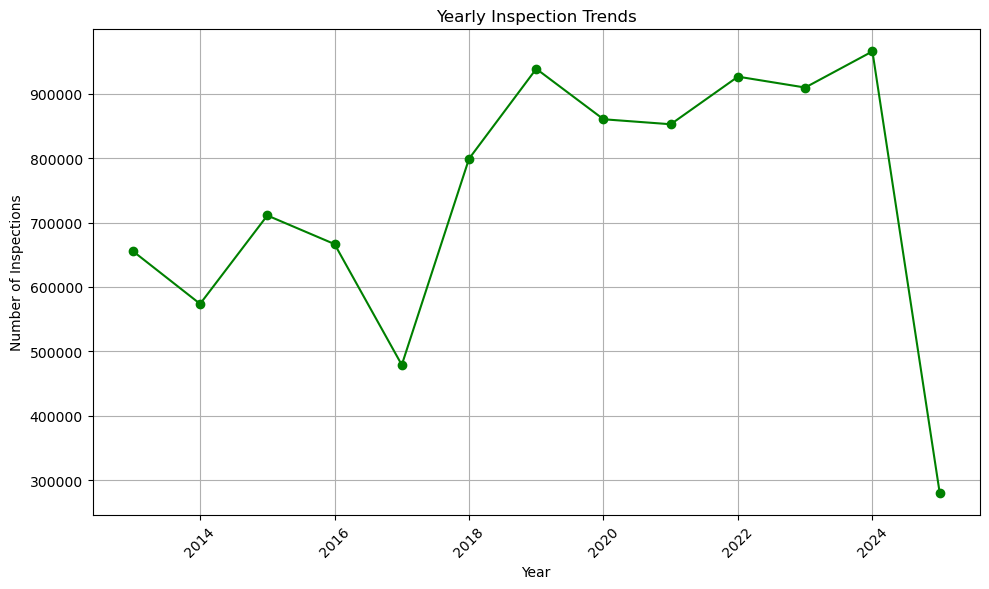

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_inspections['inspection_year'], yearly_inspections['inspection_count'], marker='o', color='g')

plt.title('Yearly Inspection Trends')
plt.xlabel('Year')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

The plot shows a sudden drop in inspections in 2020, which could be due to the COVID-19 pandemic. The data shows a significant increase in inspections in 2022, possibly as a result of backlog from the previous years.

### Question #2

First, split the latitude/longitude column into separate columns.

In [ ]:
# Remove parentheses and split into two columns
df_inspections_joined[['latitude', 'longitude']] = df_inspections_joined['latitude/longitude'].str.strip('()').str.split(', ', expand=True)
df_inspections_joined['latitude'] = pd.to_numeric(df_inspections_joined['latitude'], errors='coerce')
df_inspections_joined['longitude'] = pd.to_numeric(df_inspections_joined['longitude'], errors='coerce')

In [ ]:
df_inspections_slim = df_inspections_joined[['permit', 'inspection_result', 'longitude', 'latitude']]
df_inspections_slim.head()

,permit,inspection_result,longitude,latitude
0,14044-10000-02293,Partial Approval,-118.41437,34.06364
1,15016-10000-18196,Insp Cancelled,-118.22981,34.03143
2,15014-10000-04931,Approved,-118.38853,34.13745
3,16042-90000-14712,Permit Finaled,-118.48578,34.07732
4,15016-20001-17211,Permit Finaled,-118.39963,34.03878


Convert the latitude and longitude columns to geometry points.

In [ ]:
gdf_points = gpd.GeoDataFrame(df_inspections_slim,
                              geometry=gpd.points_from_xy(df_inspections_slim['longitude'], df_inspections_slim['latitude']),
                              crs="EPSG:4326")

In [ ]:
gdf_points.head()

,permit,inspection_result,longitude,latitude,geometry
0,14044-10000-02293,Partial Approval,-118.41437,34.06364,POINT (-118.41437 34.06364)
1,15016-10000-18196,Insp Cancelled,-118.22981,34.03143,POINT (-118.22981 34.03143)
2,15014-10000-04931,Approved,-118.38853,34.13745,POINT (-118.38853 34.13745)
3,16042-90000-14712,Permit Finaled,-118.48578,34.07732,POINT (-118.48578 34.07732)
4,15016-20001-17211,Permit Finaled,-118.39963,34.03878,POINT (-118.39963 34.03878)


In [ ]:
gdf_tracts = gpd.read_file("tracts.geojson")

In [ ]:
gdf_joined = gpd.sjoin(gdf_points, gdf_tracts, how="inner", predicate='within')
gdf_joined.head()

,permit,inspection_result,longitude,latitude,geometry,index_right,OBJECTID,TRACT,TRACT_ID,TOOLTIP,NLA_URL
0,14044-10000-02293,Partial Approval,-118.41437,34.06364,POINT (-118.41437 34.06364),24689,24690,TR 5609,101636.0,TR 5609,navigatela/reports/dc_pin_trct_detail.cfm?trac...
1,15016-10000-18196,Insp Cancelled,-118.22981,34.03143,POINT (-118.22981 34.03143),1754,1755,M. L. WICKS SUBDIVISION OF THE GARBOLINO-COOPE...,93819.0,M. L. WICKS SUBDIVISION OF THE GARBOLINO-COOPE...,navigatela/reports/dc_pin_trct_detail.cfm?trac...
2,15014-10000-04931,Approved,-118.38853,34.13745,POINT (-118.38853 34.13745),26909,26910,TR 7497,102585.0,TR 7497,navigatela/reports/dc_pin_trct_detail.cfm?trac...
3,16042-90000-14712,Permit Finaled,-118.48578,34.07732,POINT (-118.48578 34.07732),11208,11209,TR 14944,71045.0,TR 14944,navigatela/reports/dc_pin_trct_detail.cfm?trac...
4,15016-20001-17211,Permit Finaled,-118.39963,34.03878,POINT (-118.39963 34.03878),13102,13103,TR 19015,72481.0,TR 19015,navigatela/reports/dc_pin_trct_detail.cfm?trac...


Count the number of inspections per tract.

In [ ]:
inspection_count = gdf_joined.groupby("TRACT").size().reset_index(name='inspection_count')
inspection_count.sort_values(by='inspection_count', ascending=False, inplace=True)
inspection_count.reset_index(drop=True, inplace=True)
inspection_count[:10]

,TRACT,inspection_count
0,RANCHO SAUSAL REDONDO,123677
1,TR 1000,66032
2,TR 9300,57793
3,TR 5609,50718
4,TR 6170,36864
5,TR 7555,35257
6,TR 2955,32933
7,LANKERSHIM RANCH LAND AND WATER CO.,30642
8,,28310
9,TR 1200,25526


In [ ]:
gdf_inspection_count = gdf_tracts.merge(inspection_count, on="TRACT", how="left").fillna(0)
gdf_inspection_count.head()

,OBJECTID,TRACT,TRACT_ID,TOOLTIP,NLA_URL,geometry,inspection_count
0,1,0,0.0,0,0,"MULTIPOLYGON (((-118.2609 33.71584, -118.27272...",0.0
1,2,'LOS ANGELES LAND AND WATER CO''S SUBDIVISION ...,60323.0,'LOS ANGELES LAND AND WATER CO''S SUBDIVISION ...,navigatela/reports/dc_pin_trct_detail.cfm?trac...,"POLYGON ((-118.37955 34.22264, -118.37944 34.2...",1.0
2,3,,0.0,0,0,"MULTIPOLYGON (((-118.32179 33.71748, -118.3218...",28310.0
3,4,"""THE BEAUDRY TRACT"" KNOWN AS BELLEVUE TERRACE ...",60322.0,"""THE BEAUDRY TRACT"" KNOWN AS BELLEVUE TERRACE ...",navigatela/reports/dc_pin_trct_detail.cfm?trac...,"MULTIPOLYGON (((-118.25496 34.04927, -118.2553...",134.0
4,5,100 VARAS TRACT,60324.0,100 VARAS TRACT,navigatela/reports/dc_pin_trct_detail.cfm?trac...,"POLYGON ((-118.285 33.72134, -118.28465 33.720...",0.0


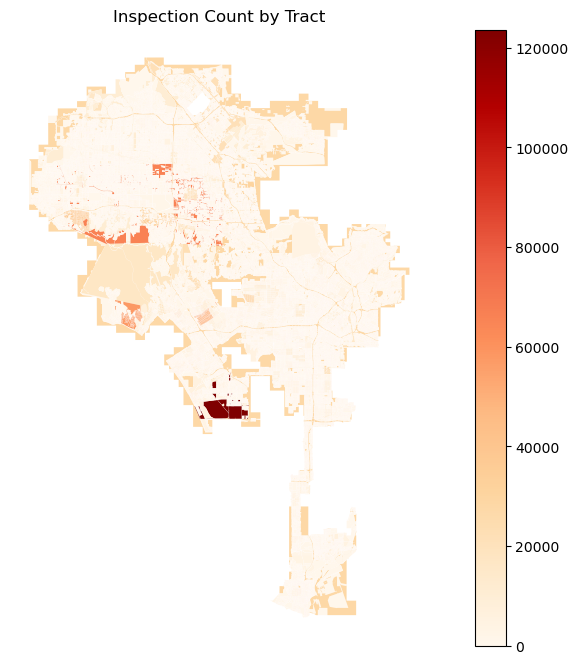

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
gdf_inspection_count.plot(column='inspection_count', cmap='OrRd', legend=True, ax=ax)
plt.title("Inspection Count by Tract")
plt.axis('off')
plt.show()

The heatmap indicates that the areas with the highest inspection counts are located in the southern part of the city.
The international airport area (LAX) also shows a significant number of inspections, indicating ongoing construction or renovation projects in that area.

### Question 3

In [70]:
df3_joined = pd.merge(df_inspections_cleaned,
                      df_permits_cleaned, 
                     on='permit',
                     how='left')

df3_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685048 entries, 0 to 9685047
Data columns (total 60 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   address                                   object 
 1   permit                                    object 
 2   permit_status                             object 
 3   inspection_date                           object 
 4   inspection_type                           object 
 5   inspection_result                         object 
 6   latitude/longitude_x                      object 
 7   assessor_book                             object 
 8   assessor_page                             object 
 9   assessor_parcel                           object 
 10  tract                                     object 
 11  block                                     object 
 12  lot                                       object 
 13  reference_#_(old_permit_#)                object 
 14  st

Clean city column.

In [71]:
df3_joined['contractor_city'] = df3_joined['contractor_city'].str.replace(r'[^A-Za-z0-9\s]', '', regex=True)
df3_joined['contractor_city'] = df3_joined['contractor_city'].str.upper().str.strip()

Tag contractors as out of town if they are situated outside Los Angeles

In [72]:
df3_joined['is_out_of_town'] = df3_joined['contractor_city'] != 'LOS ANGELES'
df3_joined['is_out_of_town'] = df3_joined['is_out_of_town'].astype(int)

List unique inspection results.

In [73]:
df_inspections_cleaned['inspection_result'].unique()

array(['Partial Approval', 'Insp Cancelled', 'Approved', 'Permit Finaled',
       'Insp Scheduled', 'Not Ready for Inspection', 'OK for CofO',
       'Completed (special insp)', 'Partial Inspection',
       'Corrections Issued', 'CofO in Progress', 'Cancelled',
       'Conditional Approval', 'CofO Issued', 'SGSOV Approved',
       'SGSOV Not Ready', 'CofO on Hold', 'Not Applicable',
       'No Access for Inspection', 'Completed', 'Permit Closed',
       'SGSOV Not Required', 'OK to Expire Permit', 'Permit Expired',
       'CofO Corrected', 'OK to Issue CofO', 'Off-Hour Fees Due',
       'SGSOV Gas Company', 'Pending Review', 'Pending', 'SGSOV No Gas',
       'Not Required', 'OK for TCO', 'Permit Closed-Status Void',
       'Permit Withdrawn', 'Permit Finaled-Status Void',
       'Order to Comply Issued', nan, 'Approved Pending GreenApproval',
       'No Progress', 'Permit Expired-Status Void',
       'SGSOV Letter Request', 'CofO Issued-Status Void',
       'Violation Observed', 'Event

To simplify, tag the following inspections results as positive outcomes:

In [89]:
negative_result = ['Violation Observed', 'Corrections Issued', 'Order to Comply Issued', 'Permit Expired', 'Permit Expired-Status Void', 'Permit Withdrawn', 'Permit Withdrawn-Status Void', 'Permit Revoked',
                   'Pre-inspection Cancelled', 'CofO Revoked', 'SGSOV Gas Company', 'No Access for Inspection', 'Insp Cancelled', 'Not Ready for Inspection']
# Mark as failed if the result is not in the list above
df3_joined['inspection_failed'] = df3_joined['inspection_result'].isin(negative_result)
df3_joined['inspection_failed'] = df3_joined['inspection_failed'].astype(int)

Base Model

In [90]:
import statsmodels.api as sm

# Choose features
X = df3_joined[['is_out_of_town']]
X = sm.add_constant(X)  # adds intercept
y = df3_joined['inspection_failed']

# Fit model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.555805
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      inspection_failed   No. Observations:              9685048
Model:                          Logit   Df Residuals:                  9685046
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 May 2025   Pseudo R-squ.:               1.072e-05
Time:                        17:51:49   Log-Likelihood:            -5.3830e+06
converged:                       True   LL-Null:                   -5.3831e+06
Covariance Type:            nonrobust   LLR p-value:                 6.560e-27
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.1546      0.002   -479.836      0.000      -1.159      -1.150
is_out_of_town   

#### Conclusion

Based on the model above, the odds of an inspection failing increases by 0.0271, if the contractor is out of town.
This is a small value but indicates that an out-of-town contractor has some contribution to a failed inspection.

